<a href="https://colab.research.google.com/github/RohanAkkineni/Autism-Prediction/blob/main/V3_Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("/content/cleaned_train_test.csv")

In [4]:
X = df.drop('Autism_Diagnosis', axis = 1)
y = df['Autism_Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Logistic Regression
model_lr = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)
model_lr.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_lr.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_lr.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       480
         1.0       0.84      0.78      0.81       160

    accuracy                           0.91       640
   macro avg       0.88      0.86      0.87       640
weighted avg       0.90      0.91      0.91       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       135
         1.0       0.70      0.56      0.62        25

    accuracy                           0.89       160
   macro avg       0.81      0.76      0.78       160
weighted avg       0.89      0.89      0.89       160



In [9]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier(random_state = 42)
model_dt.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_dt.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_dt.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       160

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       135
         1.0       0.47      0.64      0.54        25

    accuracy                           0.83       160
   macro avg       0.70      0.75      0.72       160
weighted avg       0.86      0.83      0.84       160



In [10]:
# SVM
model_svc = SVC(random_state = 42)
model_svc.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_svc.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_svc.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       480
         1.0       0.90      0.83      0.86       160

    accuracy                           0.93       640
   macro avg       0.92      0.90      0.91       640
weighted avg       0.93      0.93      0.93       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       135
         1.0       0.71      0.48      0.57        25

    accuracy                           0.89       160
   macro avg       0.81      0.72      0.75       160
weighted avg       0.88      0.89      0.88       160



In [11]:
# Neural Network
input_features = X_train_scaled.shape[1]

nn_1 = tf.keras.models.Sequential()
# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim= input_features))
# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))
# Third hidden layer
nn_1.add(tf.keras.layers.Dense(units=20, activation="relu"))
# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_1.fit(X_train_scaled, y_train, epochs=150)

model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
# Check the structure of the model
nn_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5560 - loss: 0.6652
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7778 - loss: 0.4618 
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8769 - loss: 0.3530
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8837 - loss: 0.3130
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.2766 
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9109 - loss: 0.2463
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9029 - loss: 0.2469 
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9203 - loss: 0.2195
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9257 - loss: 0.1968 
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9270 - loss: 0.1888 
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9288 - loss: 0.1966 
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           6,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,075 (148.73 KB)

 Trainable params: 12,691 (49.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,384 (99.16 KB)

In [12]:
y_predict = nn_1.predict(X_train_scaled)
Y_predict = np.round(y_predict)
training_report = classification_report(y_train, Y_predict)
print("\nTraining Classification Report\n", training_report)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       160

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640



In [13]:
y_predict = nn_1.predict(X_test_scaled)
Y_predict = np.round(y_predict)
testing_report = classification_report(y_test, Y_predict)
print("Testing Classification Report\n", testing_report)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       135
         1.0       0.60      0.48      0.53        25

    accuracy                           0.87       160
   macro avg       0.75      0.71      0.73       160
weighted avg       0.86      0.87      0.86       160



**Random OverSampling**

In [8]:
# ROS - X_train, y_train
# Standard Scaler - X_train, X_test

In [9]:
# RANDOM OVERSAMPLING
ROS = RandomOverSampler(random_state=1)
X_resampled, y_resampled= ROS.fit_resample(X_train_scaled, y_train)

In [10]:
# BEFORE ROS
print("BEFORE ROS")
print("Total rows of y:", len(y_train))
print(y_train.value_counts())

# AFTER ROS
print("\nAFTER ROS")
print("Total rows of y:", len(y_resampled))
print(y_resampled.value_counts())

BEFORE ROS
Total rows of y: 640
Autism_Diagnosis
0.0    480
1.0    160
Name: count, dtype: int64

AFTER ROS
Total rows of y: 960
Autism_Diagnosis
0.0    480
1.0    480
Name: count, dtype: int64


In [17]:
# 320 rows have been Augmented Using ROS where the minority class 1.0, which is Autistic has been increased by 320 rows. The same increase is seen for X_train data as well.
# Now we implement all models and check their accuracy scores

In [18]:
# ROS Logistic Regression
model_lr_ros = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)
model_lr_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_lr_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_lr_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       480
         1.0       0.86      0.88      0.87       480

    accuracy                           0.87       960
   macro avg       0.87      0.87      0.87       960
weighted avg       0.87      0.87      0.87       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       135
         1.0       0.60      0.72      0.65        25

    accuracy                           0.88       160
   macro avg       0.77      0.82      0.79       160
weighted avg       0.89      0.88      0.89       160



In [19]:
# Decision Tree
model_dt_ros = tree.DecisionTreeClassifier(random_state = 78)
model_dt_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_dt_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_dt_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       135
         1.0       0.53      0.68      0.60        25

    accuracy                           0.86       160
   macro avg       0.73      0.78      0.75       160
weighted avg       0.87      0.86      0.86       160



In [20]:
# SVM
model_svc_ros = SVC(kernel = 'rbf') #rbf gave better results than poly, linear, sigmoid
model_svc_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_svc_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("Training Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_svc_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       480
         1.0       0.92      0.97      0.95       480

    accuracy                           0.94       960
   macro avg       0.94      0.94      0.94       960
weighted avg       0.94      0.94      0.94       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       135
         1.0       0.64      0.64      0.64        25

    accuracy                           0.89       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.89      0.89      0.89       160



In [21]:
input_features = X_resampled.shape[1]
nn_1_ros = tf.keras.models.Sequential()
# First hidden layer
nn_1_ros.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim= input_features))
# Second hidden layer
nn_1_ros.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))
# Third hidden layer
nn_1_ros.add(tf.keras.layers.Dense(units=20, activation="relu"))
# Output layer
nn_1_ros.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn_1_ros.summary()

nn_1_ros.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_1_ros.fit(X_resampled, y_resampled, epochs=150)

model_loss, model_accuracy = nn_1_ros.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │           6,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,691 (49.57 KB)

 Trainable params: 12,691 (49.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7068 - loss: 0.6184
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8639 - loss: 0.3947
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8886 - loss: 0.3032
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9010 - loss: 0.2663
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8995 - loss: 0.2262
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9012 - loss: 0.2253
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9376 - loss: 0.1583
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9433 - loss: 0.1524
Epoch 9/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9719 - loss: 0.1346
Epoch 10/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9670 - loss: 0.1366
Epoch 11/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.0792
Epoch 12/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [22]:
y_predict_train = nn_1_ros.predict(X_resampled)
Y_predict_train = np.round(y_predict_train)
training_report = classification_report(y_resampled, Y_predict_train)
print("Training Report\n", training_report)

y_predict = nn_1_ros.predict(X_test_scaled)
Y_predict = np.round(y_predict)
testing_report = classification_report(y_test, Y_predict)
print("\nTesting Report\n", testing_report)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Training Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Testing Report
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       135
         1.0       0.56      0.40      0.47        25

    accuracy                           0.86       160
   macro avg       0.72      0.67      0.69       160
weighted avg       0.84      0.86      0.85       160



**EXPERIMENTS With ADA Boost, XGBOOST and LightGBM, Random Forest and Gradient Boosting**

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Random Forest Classifier for Original Dataset
model_rfr = RandomForestClassifier(random_state = 42)
model_rfr.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_rfr.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("\nOriginal Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_rfr.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)


Original Dataset

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       160

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       135
         1.0       0.68      0.52      0.59        25

    accuracy                           0.89       160
   macro avg       0.80      0.74      0.76       160
weighted avg       0.88      0.89      0.88       160



In [15]:
# Random Forest Classifier for ROS
from xgboost import XGBClassifier
model_rfr_ros = XGBClassifier(random_state = 42)
model_rfr_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_rfr_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("\nROS Augmented Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_rfr_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)


ROS Augmented Dataset

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       135
         1.0       0.65      0.60      0.62        25

    accuracy                           0.89       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.88      0.89      0.89       160



In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
# Gradient Boosting Classifier for Original Dataset
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_gb.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("\nOriginal Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_gb.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)


Original Dataset

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       480
         1.0       0.97      0.89      0.93       160

    accuracy                           0.97       640
   macro avg       0.97      0.94      0.96       640
weighted avg       0.97      0.97      0.97       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       135
         1.0       0.70      0.56      0.62        25

    accuracy                           0.89       160
   macro avg       0.81      0.76      0.78       160
weighted avg       0.89      0.89      0.89       160



In [18]:
# Gradient Boosting Classifier for ROS
model_gb_ros = GradientBoostingClassifier(random_state=42)
model_gb_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_gb_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("\nROS Augmented Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_gb_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)


ROS Augmented Dataset

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       480
         1.0       0.95      0.98      0.97       480

    accuracy                           0.97       960
   macro avg       0.97      0.97      0.97       960
weighted avg       0.97      0.97      0.97       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.92       135
         1.0       0.59      0.68      0.63        25

    accuracy                           0.88       160
   macro avg       0.76      0.80      0.78       160
weighted avg       0.88      0.88      0.88       160



In [23]:
from xgboost import XGBClassifier

In [24]:
# XGBOOST for Original Dataset
model_xgb = XGBClassifier(random_state = 42)
model_xgb.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_xgb.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("\nOriginal Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_xgb.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)


Original Dataset

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       160

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       135
         1.0       0.65      0.60      0.62        25

    accuracy                           0.89       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.88      0.89      0.89       160



In [25]:
# XGBOOST for ROS
from xgboost import XGBClassifier
model_xgb_ros = XGBClassifier(random_state = 42)
model_xgb_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_xgb_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("\nROS Augmented Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_xgb_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)


ROS Augmented Dataset

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       135
         1.0       0.65      0.60      0.62        25

    accuracy                           0.89       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.88      0.89      0.89       160



In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
# Ada Boost for Original Dataset
model_ada = AdaBoostClassifier()
model_ada.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_ada.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("\nOriginal Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_ada.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)


Original Dataset

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       480
         1.0       0.78      0.73      0.75       160

    accuracy                           0.88       640
   macro avg       0.85      0.83      0.84       640
weighted avg       0.88      0.88      0.88       640


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       135
         1.0       0.68      0.60      0.64        25

    accuracy                           0.89       160
   macro avg       0.80      0.77      0.79       160
weighted avg       0.89      0.89      0.89       160



In [28]:
# Ada Boost for ROS
model_ada_ros = AdaBoostClassifier()
model_ada_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_ada_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("\nROS Augmented Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_ada_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)


ROS Augmented Dataset

Training Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       480
         1.0       0.85      0.87      0.86       480

    accuracy                           0.86       960
   macro avg       0.86      0.86      0.86       960
weighted avg       0.86      0.86      0.86       960


Testing Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       135
         1.0       0.56      0.72      0.63        25

    accuracy                           0.87       160
   macro avg       0.75      0.81      0.78       160
weighted avg       0.89      0.87      0.88       160



In [29]:
import lightgbm as lgb

In [30]:
# Ada Boost for Original Dataset
model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(X_train_scaled, y_train)

# Training Classification Report
train_pred = model_lgb.predict(X_train_scaled)
training_report = classification_report(y_train, train_pred)
print("\nOriginal Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_lgb.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

[LightGBM] [Info] Number of positive: 160, number of negative: 480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [34]:
# Light GBM for ROS
model_lgb_ros = lgb.LGBMClassifier(random_state=42)
model_lgb_ros.fit(X_resampled, y_resampled)

# Training Classification Report
train_pred = model_lgb_ros.predict(X_resampled)
training_report = classification_report(y_resampled, train_pred)
print("\nROS Augmented Dataset\n\nTraining Classification Report\n", training_report)

# Testing Classification Report
y_pred = model_lgb_ros.predict(X_test_scaled)
testing_report = classification_report(y_test, y_pred)
print("\nTesting Classification Report\n", testing_report)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 480, number of negative: 480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 960, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

ROS Augmented Dataset

Training Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       480
         1.0       1.00      1.00      1.00       480

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960


Testing Classification Report
               

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Kolmogorov Arnold Networks for Autism Prediction**

In [32]:
!pip install git+https://github.com/KindXiaoming/pykan.git

  Cloning https://github.com/KindXiaoming/pykan.git to /tmp/pip-req-build-ufss8557
  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git /tmp/pip-req-build-ufss8557
  Resolved https://github.com/KindXiaoming/pykan.git to commit ecde4ec3274d3bef1ad737479cf126aed38ab530
  Preparing metadata (setup.py) ... done
  Created wheel for pykan: filename=pykan-0.2.8-py3-none-any.whl size=78235 sha256=08b1c47590d42232bc4bb3ce8f42dd8348f999b9bcdbbb74d53c8f00541988fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-w3gbm54a/wheels/12/fb/52/e82367e3774ff3370fa802d7dfac140c4cb2006f33e72d3510
Successfully built pykan


In [52]:
from kan import KAN
import torch

In [53]:
# Update train_acc and test_acc to accept tensors
def train_acc(model, train_input_tensor, train_label_tensor):
    preds = torch.argmax(model(train_input_tensor), dim=1)
    return torch.mean((preds == train_label_tensor).float())

def test_acc(model, test_input_tensor, test_label_tensor):
    preds = torch.argmax(model(test_input_tensor), dim=1)
    return torch.mean((preds == test_label_tensor).float())

In [54]:
# KAN Without Random OverSampling

In [55]:
train_input = torch.tensor(X_train_scaled, dtype=torch.float32)
train_label = torch.tensor(y_train.to_numpy(), dtype=torch.long)
test_input = torch.tensor(X_test_scaled, dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [57]:
kan = KAN(width=[5, 2], grid=4, k=6)

def train_model(model, train_input, train_label, test_input, test_label, steps=1, loss_fn=torch.nn.CrossEntropyLoss(), opt="LBFGS"):
    optimizer = torch.optim.LBFGS(model.parameters())

    # Convert NumPy arrays to PyTorch tensors
    train_input_tensor = torch.tensor(train_input, dtype=torch.float32)
    train_label_tensor = torch.tensor(train_label, dtype=torch.long)
    test_input_tensor = torch.tensor(test_input, dtype=torch.float32)
    test_label_tensor = torch.tensor(test_label, dtype=torch.long)

    for step in range(steps):
        def closure():
            optimizer.zero_grad()
            outputs = model(train_input_tensor)  # Use the tensor here
            loss = loss_fn(outputs, train_label_tensor)
            loss.backward()
            return loss

        optimizer.step(closure)

        # Calculate and log metrics (update to use tensors)
        train_accuracy = train_acc(model, train_input_tensor, train_label_tensor)
        test_accuracy = test_acc(model, test_input_tensor, test_label_tensor)


# Train the model
train_model(kan, train_input, train_label, test_input, test_label, steps=150, loss_fn=torch.nn.CrossEntropyLoss(), opt="LBFGS")

# Predictions of train val and test datasets
test_preds = torch.argmax(kan.forward(test_input).detach(),dim=1)
test_labels = test_label

train_preds = torch.argmax(kan.forward(train_input).detach(),dim=1)
train_labels = train_label

# Evaluate metrics

print("Train ACC:", accuracy_score(train_labels.numpy(), train_preds.numpy()))

print("Test ACC:", accuracy_score(test_labels.numpy(), test_preds.numpy()))

checkpoint directory created: ./model
saving model version 0.0


<ipython-input-57-090986e09f55>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_input_tensor = torch.tensor(train_input, dtype=torch.float32)
<ipython-input-57-090986e09f55>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_label_tensor = torch.tensor(train_label, dtype=torch.long)
<ipython-input-57-090986e09f55>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_input_tensor = torch.tensor(test_input, dtype=torch.float32)
<ipython-input-57-090986e09f55>:10: UserWarning: To copy construct from a tensor, it is recommended to

Train ACC: 0.85625
Test ACC: 0.925


In [58]:
# Generate the classification reports
train_report = classification_report(train_labels.numpy(), train_preds.numpy())
test_report = classification_report(test_labels.numpy(), test_preds.numpy())

# Print the classification reports
print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)

Training Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       480
           1       0.73      0.68      0.70       160

    accuracy                           0.86       640
   macro avg       0.81      0.80      0.80       640
weighted avg       0.85      0.86      0.85       640

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       135
           1       0.78      0.72      0.75        25

    accuracy                           0.93       160
   macro avg       0.87      0.84      0.85       160
weighted avg       0.92      0.93      0.92       160



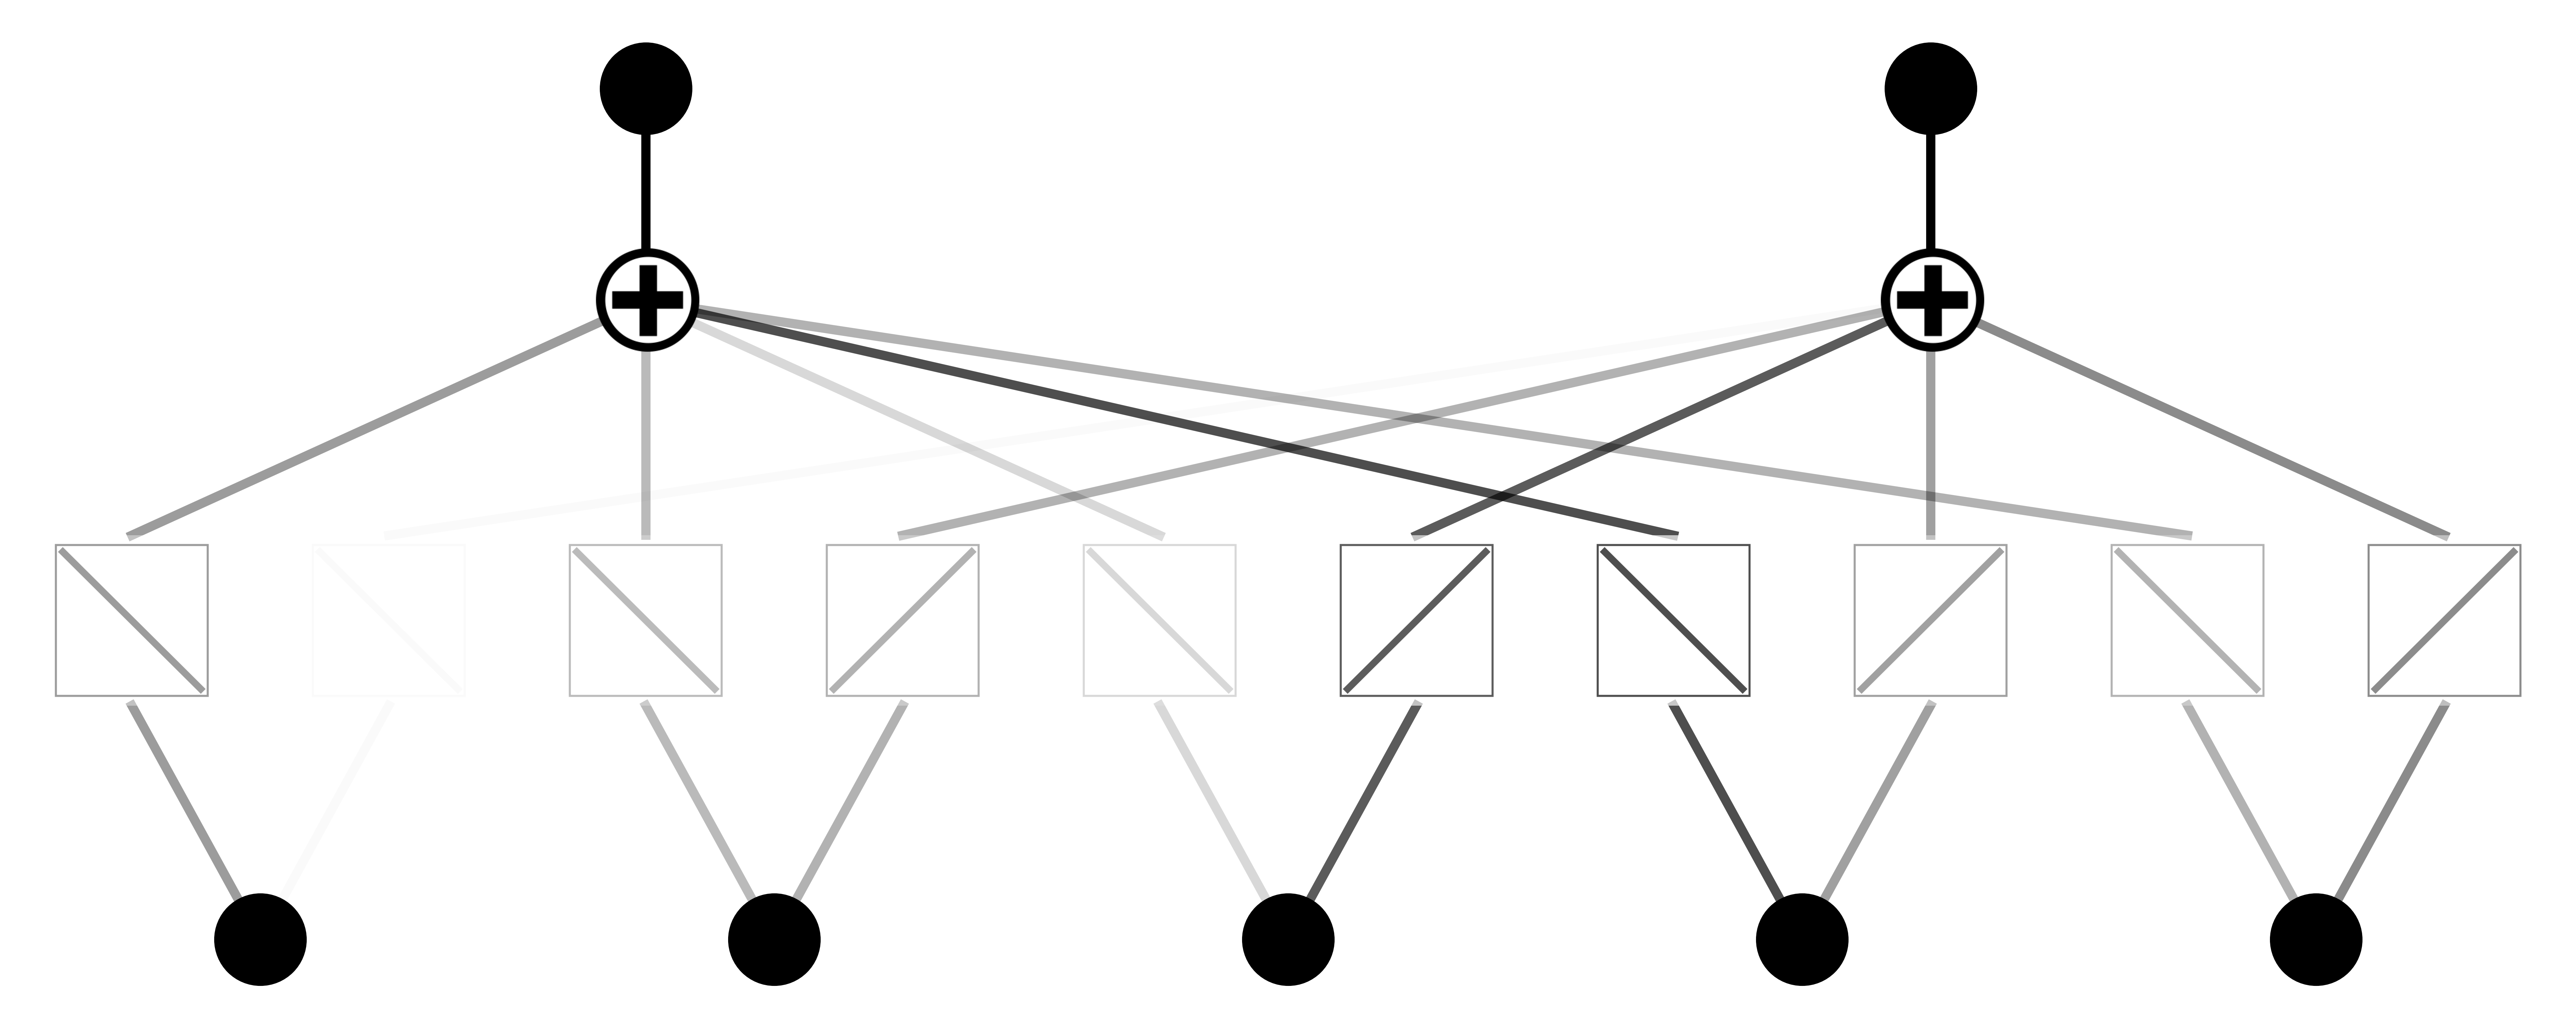

In [93]:
# Plot the KAN
kan.plot(scale = 10)

In [60]:
# KAN With Random Oversampling

In [61]:
train_input = torch.tensor(X_resampled, dtype=torch.float32)
train_label = torch.tensor(y_resampled.to_numpy(), dtype=torch.long)
test_input = torch.tensor(X_test_scaled, dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [102]:
# kan = KAN(width=[5, 2], grid=4, k=6)
model_ros = KAN(width=[9, 3], grid=2, k=3)

def train_model(model, train_input, train_label, test_input, test_label, steps=1, loss_fn=torch.nn.CrossEntropyLoss(), opt="LBFGS"):
    optimizer = torch.optim.LBFGS(model.parameters())

    # Convert NumPy arrays to PyTorch tensors
    train_input_tensor = torch.tensor(train_input, dtype=torch.float32)
    train_label_tensor = torch.tensor(train_label, dtype=torch.long)
    test_input_tensor = torch.tensor(test_input, dtype=torch.float32)
    test_label_tensor = torch.tensor(test_label, dtype=torch.long)

    for step in range(steps):
        def closure():
            optimizer.zero_grad()
            outputs = model(train_input_tensor)  # Use the tensor here
            loss = loss_fn(outputs, train_label_tensor)
            loss.backward()
            return loss

        optimizer.step(closure)

        # Calculate and log metrics (update to use tensors)
        train_accuracy = train_acc(model, train_input_tensor, train_label_tensor)
        test_accuracy = test_acc(model, test_input_tensor, test_label_tensor)
        # print(f"Step {step + 1}/{steps}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")


# Train the model
train_model(model_ros, train_input, train_label, test_input, test_label, steps=150, loss_fn=torch.nn.CrossEntropyLoss(), opt="LBFGS")

# Predictions of train val and test datasets
test_preds = torch.argmax(model_ros.forward(test_input).detach(),dim=1)
test_labels = test_label

train_preds = torch.argmax(model_ros.forward(train_input).detach(),dim=1)
train_labels = train_label

# Evaluate metrics

print("Train ACC:", accuracy_score(train_labels.numpy(), train_preds.numpy()))

print("Test ACC:", accuracy_score(test_labels.numpy(), test_preds.numpy()))

checkpoint directory created: ./model
saving model version 0.0


<ipython-input-102-4e19c331ed8c>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_input_tensor = torch.tensor(train_input, dtype=torch.float32)
<ipython-input-102-4e19c331ed8c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_label_tensor = torch.tensor(train_label, dtype=torch.long)
<ipython-input-102-4e19c331ed8c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_input_tensor = torch.tensor(test_input, dtype=torch.float32)
<ipython-input-102-4e19c331ed8c>:11: UserWarning: To copy construct from a tensor, it is recommend

Train ACC: 0.85
Test ACC: 0.88125


In [103]:
# Generate the classification reports
train_report = classification_report(train_labels.numpy(), train_preds.numpy())
test_report = classification_report(test_labels.numpy(), test_preds.numpy())

# Print the classification reports
print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)

Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       480
           1       0.84      0.86      0.85       480

    accuracy                           0.85       960
   macro avg       0.85      0.85      0.85       960
weighted avg       0.85      0.85      0.85       960

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       135
           1       0.59      0.80      0.68        25

    accuracy                           0.88       160
   macro avg       0.77      0.85      0.80       160
weighted avg       0.90      0.88      0.89       160



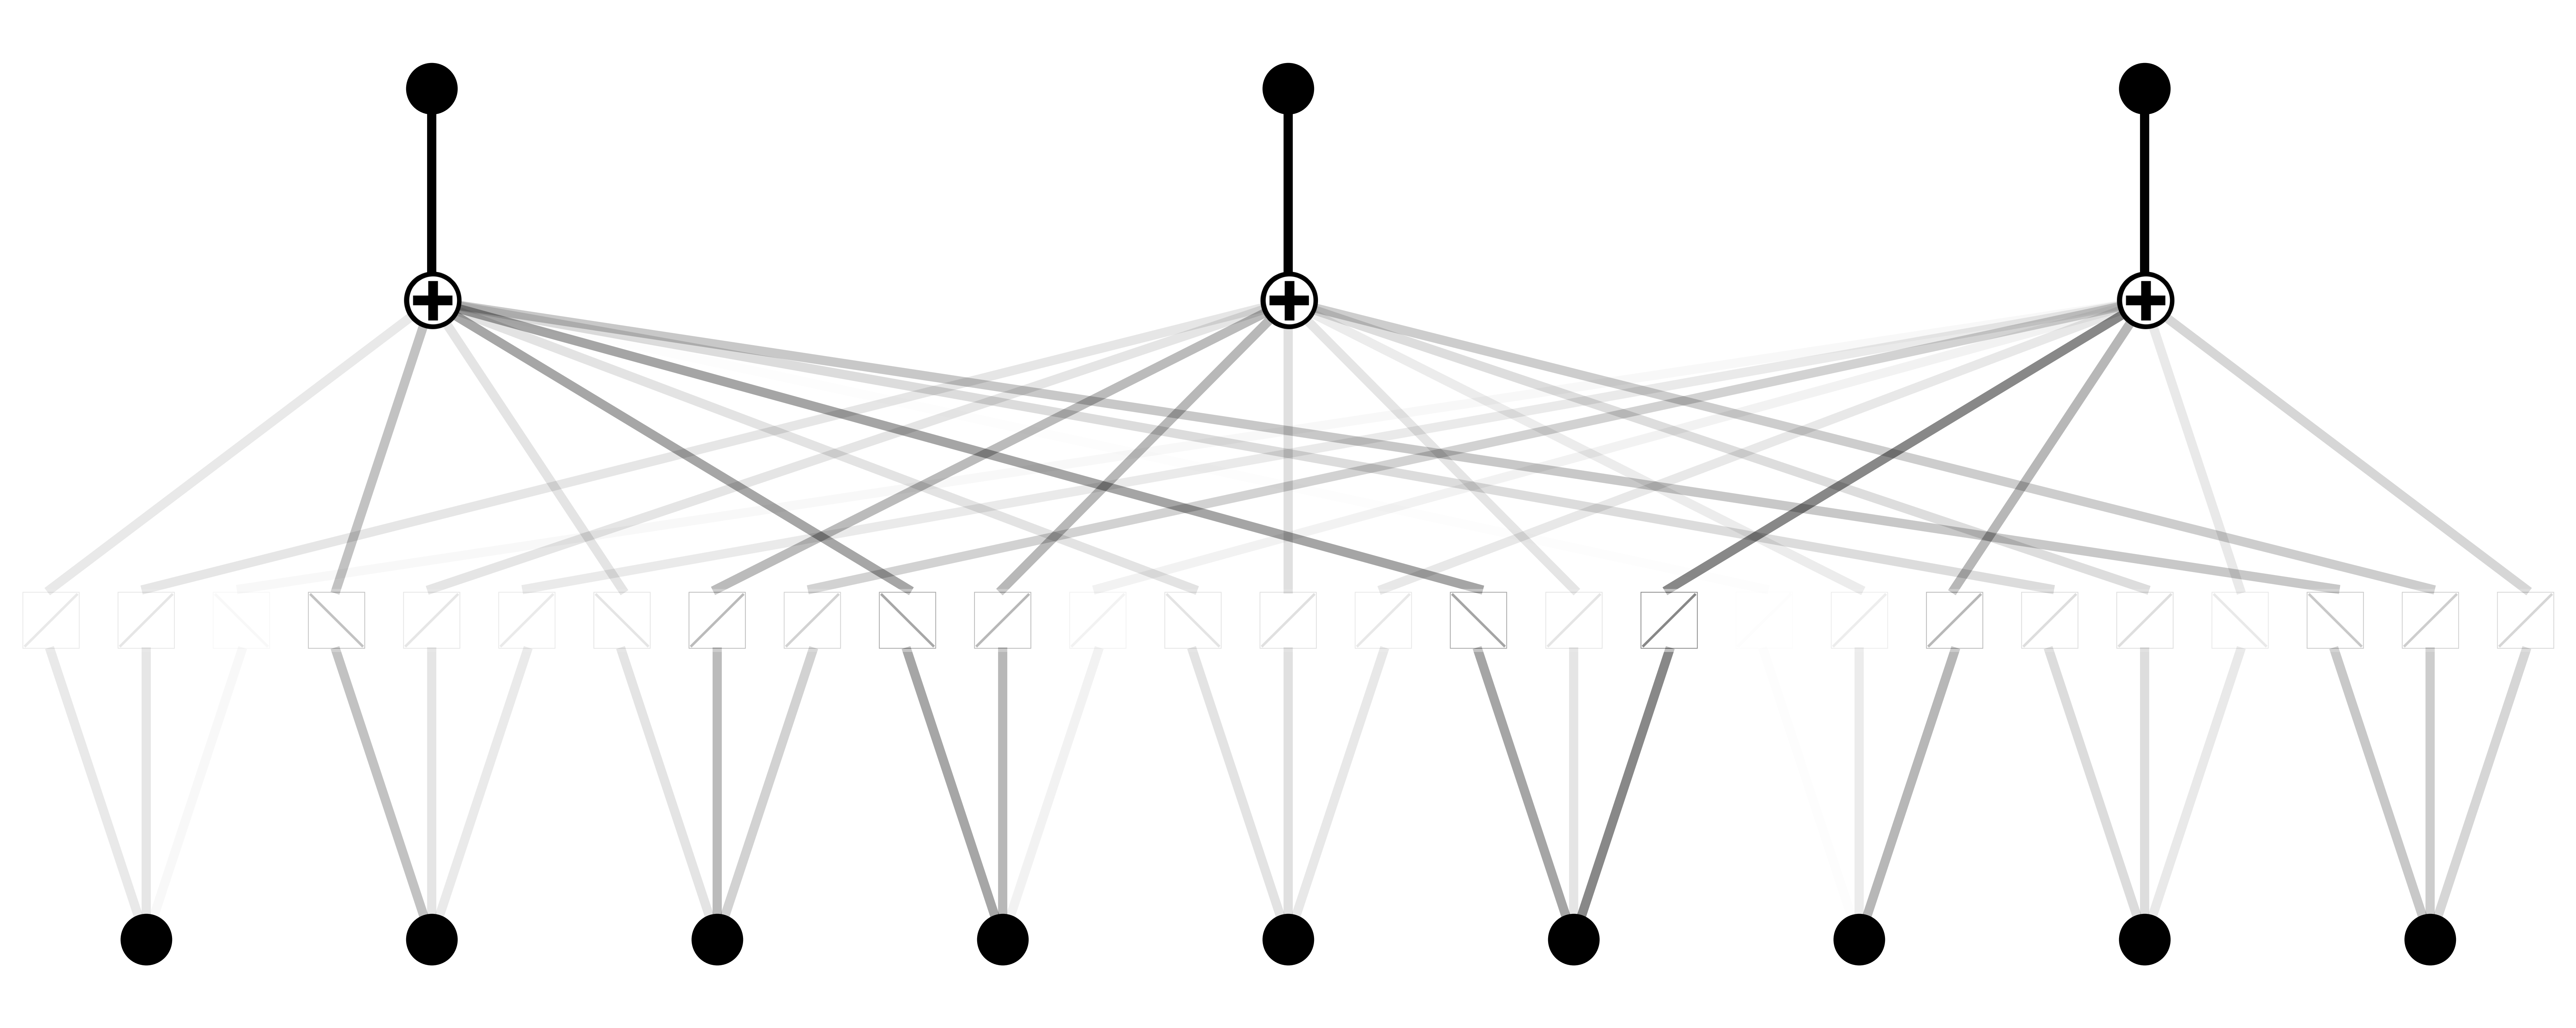

In [104]:
# Plot the KAN
model_ros.plot(scale = 10)

**PLOT RESULTS**

In [105]:
import matplotlib.pyplot as plt

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


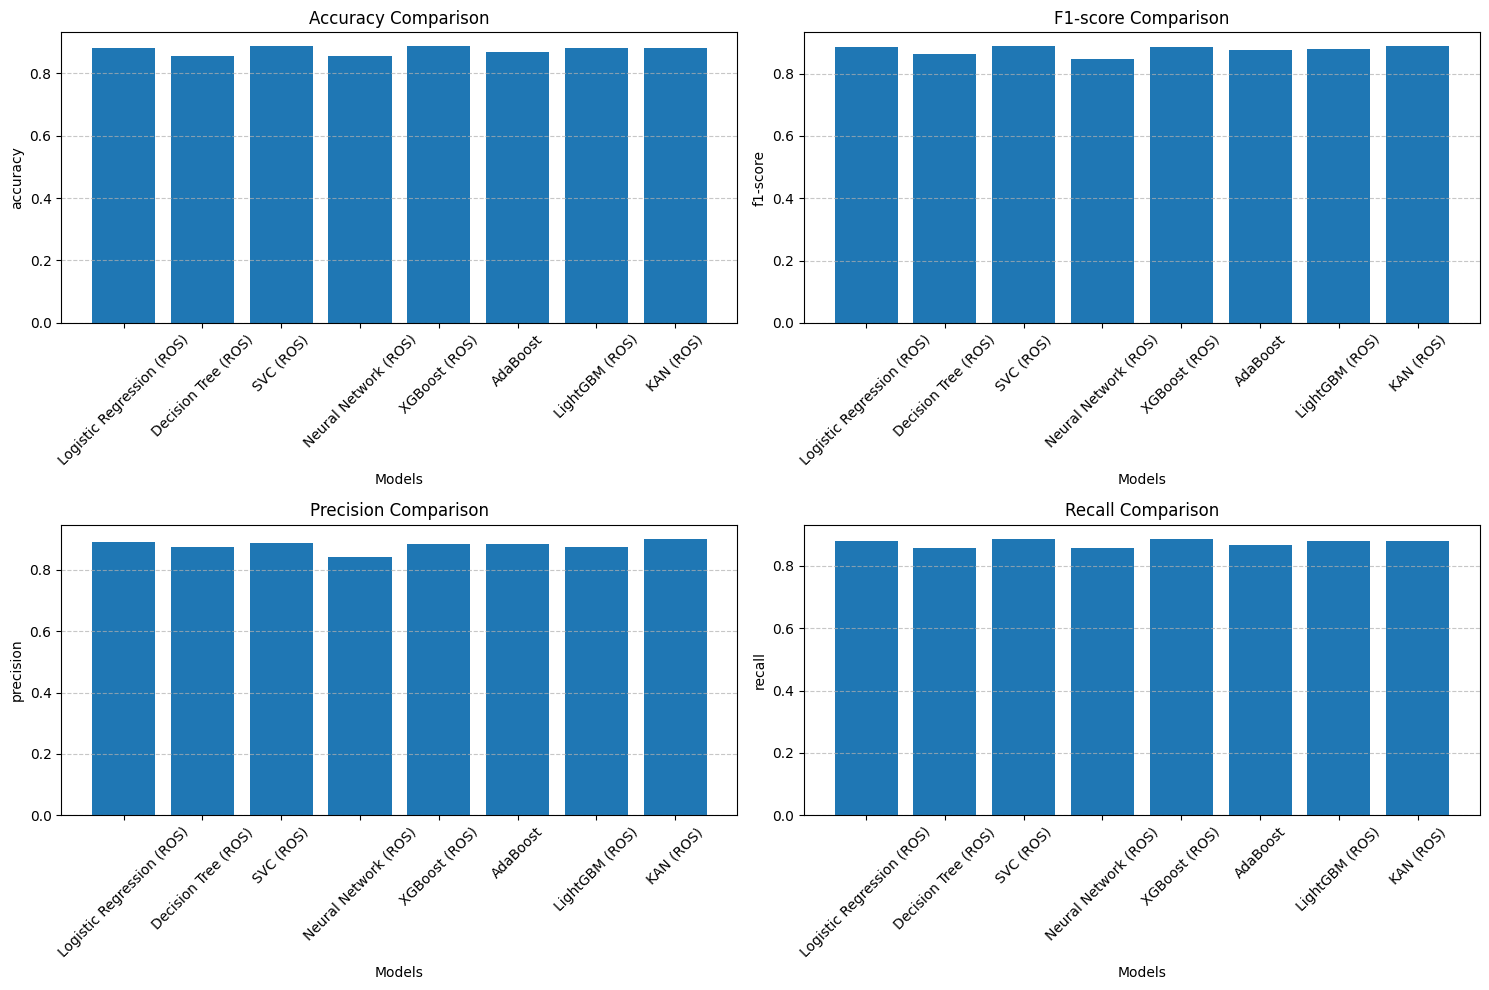

<Figure size 640x480 with 0 Axes>

In [106]:
models = [
    ("Logistic Regression (ROS)", model_lr_ros),
    ("Decision Tree (ROS)", model_dt_ros),
    ("SVC (ROS)", model_svc_ros),
    ("Neural Network (ROS)", nn_1_ros),
    ("XGBoost (ROS)", model_xgb_ros),
    ("AdaBoost", model_ada_ros),
    ("LightGBM (ROS)", model_lgb_ros),
    ("KAN (ROS)", model_ros)
]

metrics = ['accuracy', 'f1-score', 'precision', 'recall']
results = {}

for model_name, model in models:
    # Assuming you have the predict method or a way to get predictions for each model
    if model_name == "Neural Network (ROS)":
        y_pred = np.round(model.predict(X_test_scaled))
    elif model_name == "KAN" or model_name == "KAN (ROS)":
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(),dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)


    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': report['accuracy'],
        'f1-score': report['weighted avg']['f1-score'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
    }

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    x_values = list(results.keys())
    y_values = [results[model_name][metric] for model_name in x_values]
    axes[i].bar(x_values, y_values)
    axes[i].set_title(f"{metric.capitalize()} Comparison")
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel("Models")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()
plt.clf()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


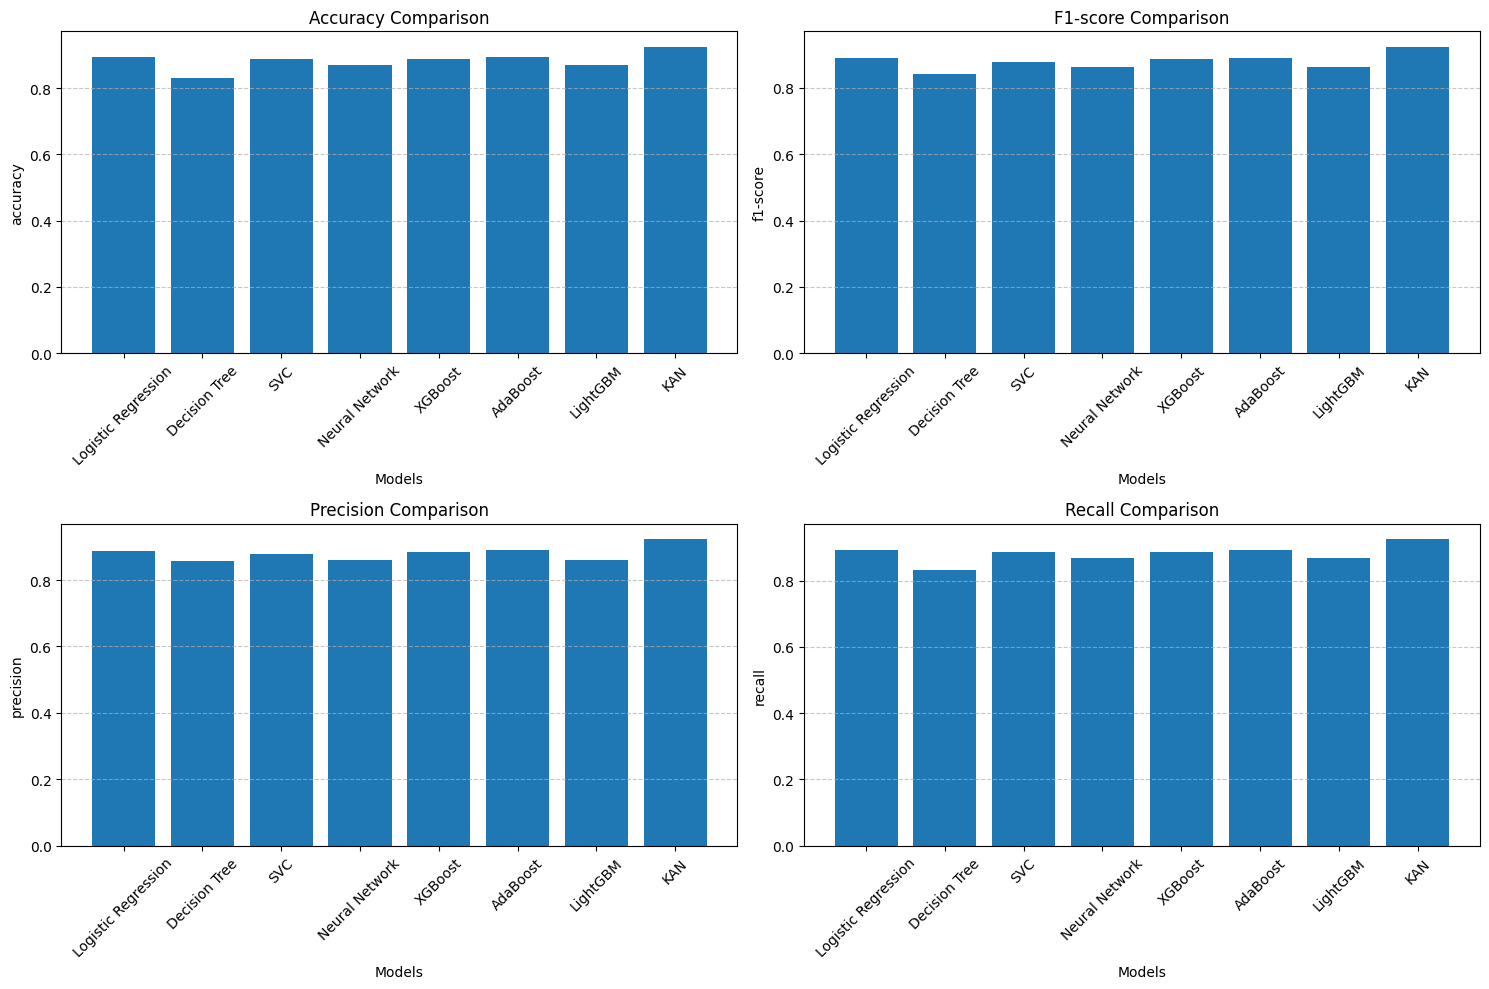

<Figure size 640x480 with 0 Axes>

In [107]:
models = [
    ("Logistic Regression", model_lr),
    ("Decision Tree", model_dt),
    ("SVC", model_svc),
    ("Neural Network", nn_1),
    ("XGBoost", model_xgb),
    ("AdaBoost", model_ada),
    ("LightGBM", model_lgb),
    ("KAN", kan)
]

metrics = ['accuracy', 'f1-score', 'precision', 'recall']
results = {}

for model_name, model in models:
    # Assuming you have the predict method or a way to get predictions for each model
    if model_name == "Neural Network":
        y_pred = np.round(model.predict(X_test_scaled))
    elif model_name == "KAN":
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(),dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)


    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': report['accuracy'],
        'f1-score': report['weighted avg']['f1-score'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
    }

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    x_values = list(results.keys())
    y_values = [results[model_name][metric] for model_name in x_values]
    axes[i].bar(x_values, y_values)
    axes[i].set_title(f"{metric.capitalize()} Comparison")
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel("Models")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()
plt.clf()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


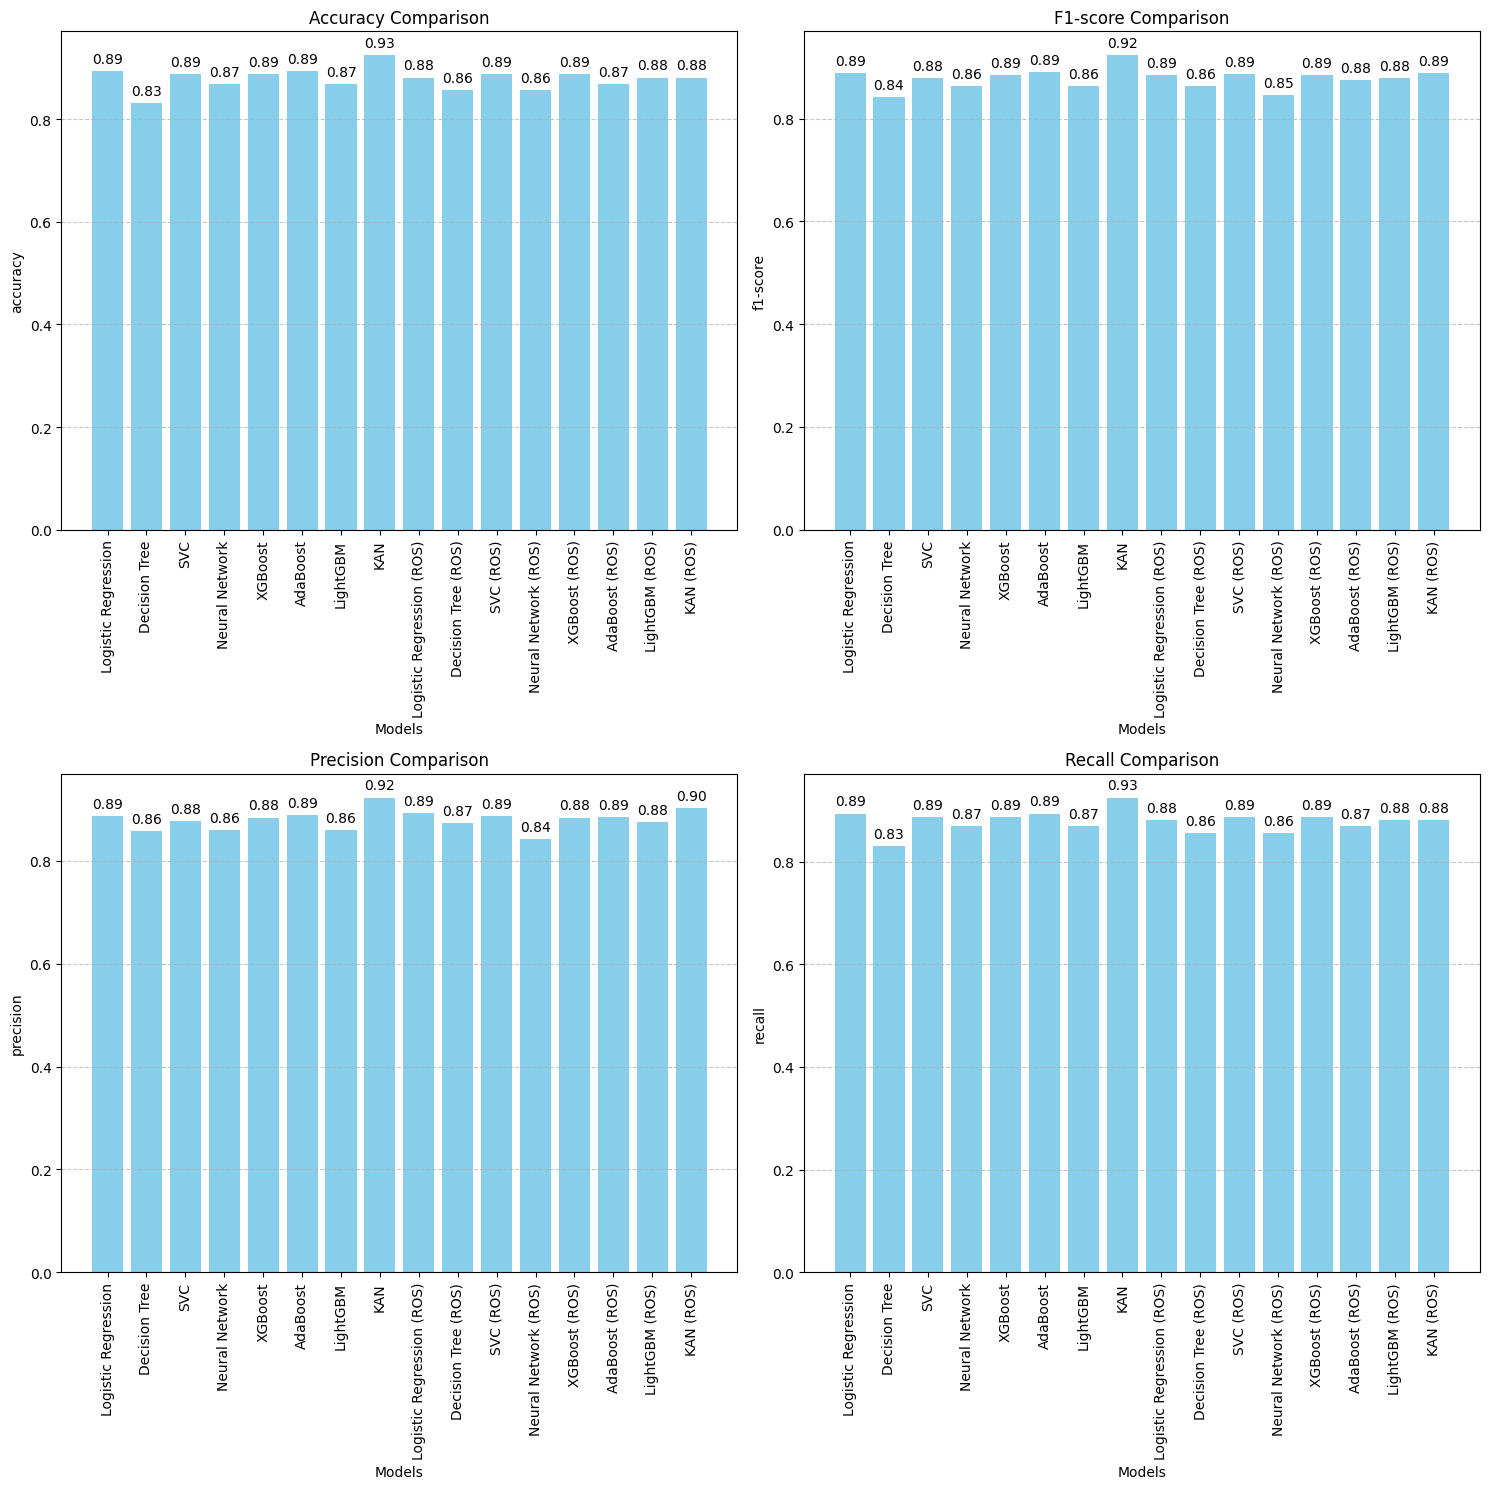

<Figure size 640x480 with 0 Axes>

In [130]:
# Define models
models = [
    ("Logistic Regression", model_lr),
    ("Decision Tree", model_dt),
    ("SVC", model_svc),
    ("Neural Network", nn_1),
    ("XGBoost", model_xgb),
    ("AdaBoost", model_ada),
    ("LightGBM", model_lgb),
    ("KAN", kan)
]

# Define metrics
metrics = ['accuracy', 'f1-score', 'precision', 'recall']
results = {}

# Calculate metrics for each model
for model_name, model in models:
    if model_name == "Neural Network":
        y_pred = np.round(model.predict(X_test_scaled))
    elif model_name == "KAN":
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(), dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': report['accuracy'],
        'f1-score': report['weighted avg']['f1-score'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
    }

# Repeat for models with ROS
models_ros = [
    ("Logistic Regression (ROS)", model_lr_ros),
    ("Decision Tree (ROS)", model_dt_ros),
    ("SVC (ROS)", model_svc_ros),
    ("Neural Network (ROS)", nn_1_ros),
    ("XGBoost (ROS)", model_xgb_ros),
    ("AdaBoost (ROS)", model_ada_ros),
    ("LightGBM (ROS)", model_lgb_ros),
    ("KAN (ROS)", model_ros)
]

for model_name, model in models_ros:
    if model_name == "Neural Network (ROS)":
        y_pred = np.round(model.predict(X_test_scaled))
    elif model_name == "KAN (ROS)":
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(), dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': report['accuracy'],
        'f1-score': report['weighted avg']['f1-score'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
    }

# Now, plotting all results in one graph

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    x_values = list(results.keys())  # All models (including ROS versions)
    y_values = [results[model_name][metric] for model_name in x_values]

    axes[i].bar(x_values, y_values, color='skyblue')
    axes[i].set_title(f"{metric.capitalize()} Comparison")
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel("Models")
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Adding values on top of each bar
    for j, value in enumerate(y_values):
        axes[i].text(j, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
plt.clf()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


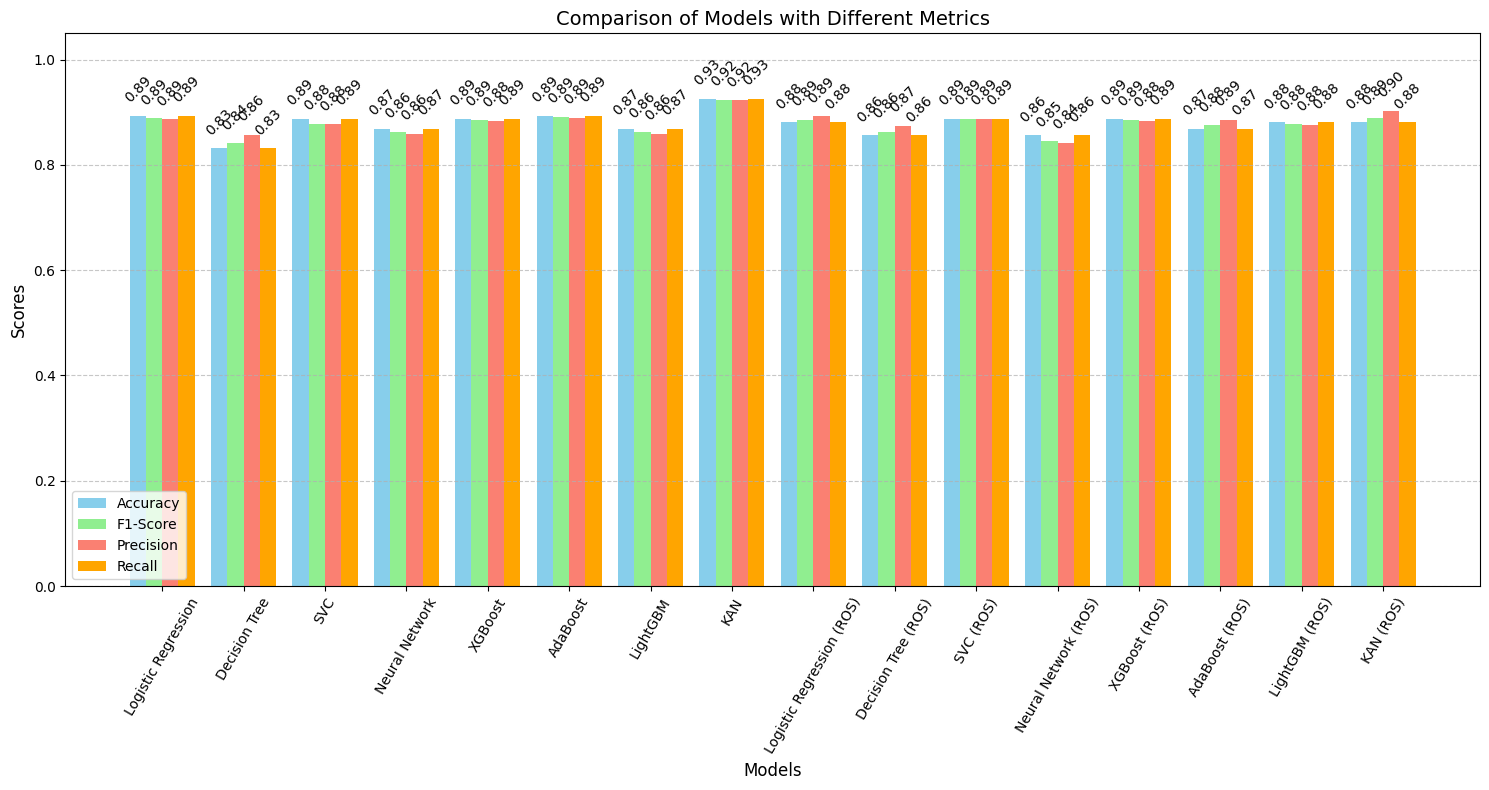

In [123]:
# Define models
models = [
    ("Logistic Regression", model_lr),
    ("Decision Tree", model_dt),
    ("SVC", model_svc),
    ("Neural Network", nn_1),
    ("XGBoost", model_xgb),
    ("AdaBoost", model_ada),
    ("LightGBM", model_lgb),
    ("KAN", kan)
]

# Define metrics
metrics = ['accuracy', 'f1-score', 'precision', 'recall']
results = {}

# Calculate metrics for each model
for model_name, model in models:
    if model_name == "Neural Network":
        y_pred = np.round(model.predict(X_test_scaled))
    elif model_name == "KAN":
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(), dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': report['accuracy'],
        'f1-score': report['weighted avg']['f1-score'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
    }

# Repeat for models with ROS
models_ros = [
    ("Logistic Regression (ROS)", model_lr_ros),
    ("Decision Tree (ROS)", model_dt_ros),
    ("SVC (ROS)", model_svc_ros),
    ("Neural Network (ROS)", nn_1_ros),
    ("XGBoost (ROS)", model_xgb_ros),
    ("AdaBoost (ROS)", model_ada_ros),
    ("LightGBM (ROS)", model_lgb_ros),
    ("KAN (ROS)", model_ros)
]

for model_name, model in models_ros:
    if model_name == "Neural Network (ROS)":
        y_pred = np.round(model.predict(X_test_scaled))
    elif model_name == "KAN (ROS)":
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(), dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': report['accuracy'],
        'f1-score': report['weighted avg']['f1-score'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
    }

# Prepare data for plotting
x_values = list(results.keys())  # All models (including ROS versions)
y_values_accuracy = [results[model_name]['accuracy'] for model_name in x_values]
y_values_f1 = [results[model_name]['f1-score'] for model_name in x_values]
y_values_precision = [results[model_name]['precision'] for model_name in x_values]
y_values_recall = [results[model_name]['recall'] for model_name in x_values]

# Set the width of the bars
bar_width = 0.2
index = range(len(x_values))

# Plotting all metrics on one graph
fig, ax = plt.subplots(figsize=(15, 8))

# Plot bars for each metric (accuracy, f1-score, precision, recall)
bar1 = ax.bar(index, y_values_accuracy, bar_width, label='Accuracy', color='skyblue')
bar2 = ax.bar([p + bar_width for p in index], y_values_f1, bar_width, label='F1-Score', color='lightgreen')
bar3 = ax.bar([p + bar_width * 2 for p in index], y_values_precision, bar_width, label='Precision', color='salmon')
bar4 = ax.bar([p + bar_width * 3 for p in index], y_values_recall, bar_width, label='Recall', color='orange')

# Adding values on top of each bar with tilted text
for bar in bar1 + bar2 + bar3 + bar4:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, rotation=45)

# Set labels and title
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Comparison of Models with Different Metrics", fontsize=14)
ax.set_xticks([p + bar_width * 1.5 for p in index])  # Set x-ticks in the center of the grouped bars
ax.set_xticklabels(x_values, rotation=60)

# Adjust y-axis limit to increase height and accommodate the top values like 0.93
ax.set_ylim(0, 1.05)  # Set y-axis limit from 0 to slightly above 1 to show the highest value clearly

# Adding grid and legend
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


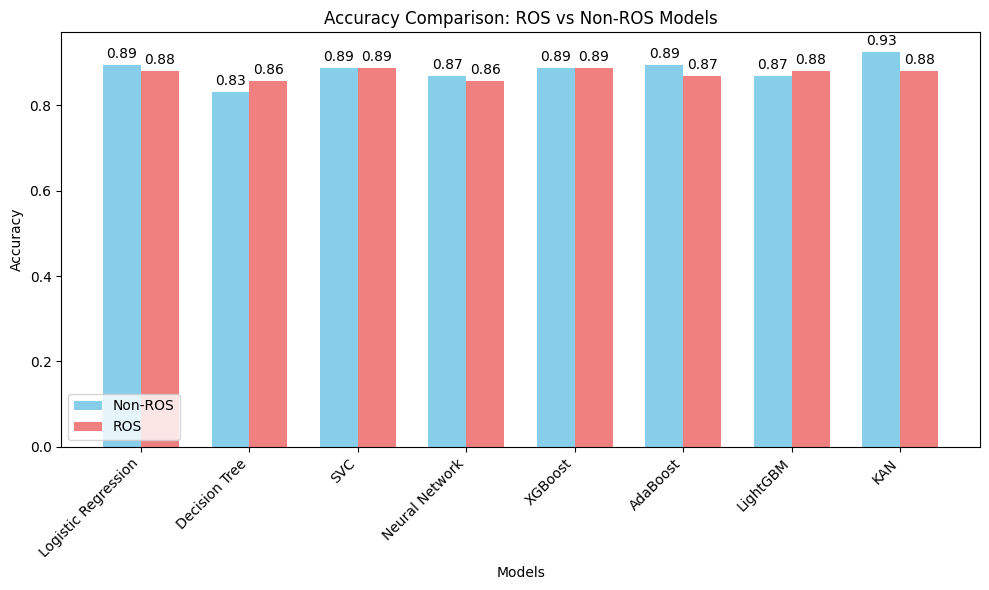

In [124]:
# Function to get accuracy for each model
def get_model_accuracy(model, model_name, X_test_scaled, y_test):
    if model_name == "Neural Network" or model_name == "Neural Network (ROS)":
        y_pred = np.round(model.predict(X_test_scaled))
    elif "KAN" in model_name:
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(), dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    return report['accuracy']

# Get accuracies for non-ROS and ROS models
accuracies_non_ros = [get_model_accuracy(model, model_name, X_test_scaled, y_test) for model_name, model in models]
accuracies_ros = [get_model_accuracy(model, model_name, X_test_scaled, y_test) for model_name, model in models_ros]

# Plotting the accuracies for non-ROS vs ROS models
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
x = np.arange(len(models))  # the label locations for non-ROS models
width = 0.35  # the width of the bars

# Plot bars for non-ROS and ROS models
rects1 = ax.bar(x - width / 2, accuracies_non_ros, width, label='Non-ROS', color='skyblue')
rects2 = ax.bar(x + width / 2, accuracies_ros, width, label='ROS', color='lightcoral')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison: ROS vs Non-ROS Models')
ax.set_xticks(x)
ax.set_xticklabels([model_name for model_name, _ in models], rotation=45, ha='right')
ax.legend()

# Add accuracy values on top of each bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


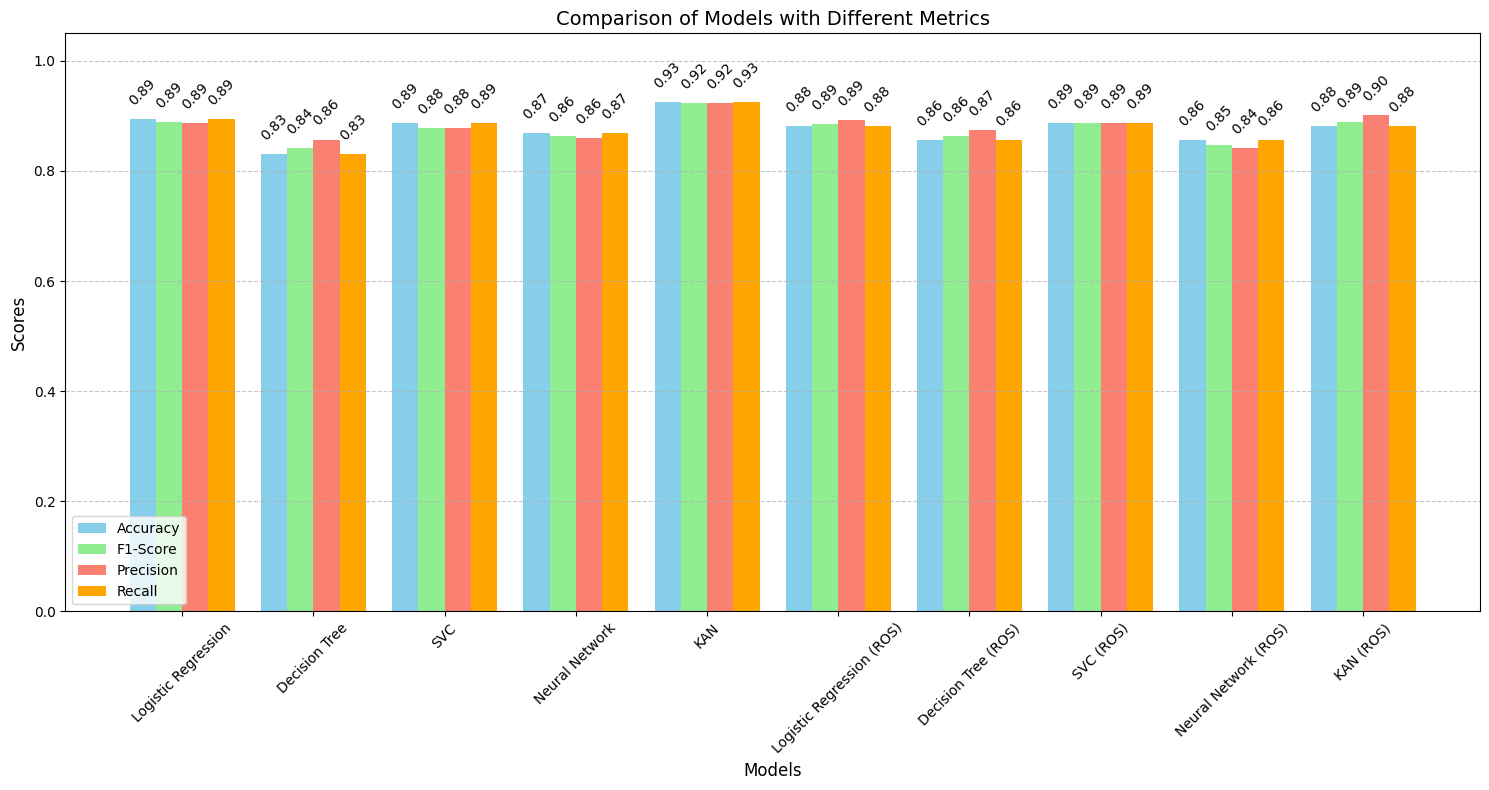

In [141]:
# Define models
models = [
    ("Logistic Regression", model_lr),
    ("Decision Tree", model_dt),
    ("SVC", model_svc),
    ("Neural Network", nn_1),
    ("KAN", kan)
]

# Define metrics
metrics = ['accuracy', 'f1-score', 'precision', 'recall']
results = {}

# Calculate metrics for each model
for model_name, model in models:
    if model_name == "Neural Network":
        y_pred = np.round(model.predict(X_test_scaled))
    elif model_name == "KAN":
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(), dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': report['accuracy'],
        'f1-score': report['weighted avg']['f1-score'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
    }

# Repeat for models with ROS
models_ros = [
    ("Logistic Regression (ROS)", model_lr_ros),
    ("Decision Tree (ROS)", model_dt_ros),
    ("SVC (ROS)", model_svc_ros),
    ("Neural Network (ROS)", nn_1_ros),
    ("KAN (ROS)", model_ros)
]

for model_name, model in models_ros:
    if model_name == "Neural Network (ROS)":
        y_pred = np.round(model.predict(X_test_scaled))
    elif model_name == "KAN (ROS)":
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(), dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': report['accuracy'],
        'f1-score': report['weighted avg']['f1-score'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
    }

# Prepare data for plotting
x_values = list(results.keys())  # All models (including ROS versions)
y_values_accuracy = [results[model_name]['accuracy'] for model_name in x_values]
y_values_f1 = [results[model_name]['f1-score'] for model_name in x_values]
y_values_precision = [results[model_name]['precision'] for model_name in x_values]
y_values_recall = [results[model_name]['recall'] for model_name in x_values]

# Set the width of the bars
bar_width = 0.2
index = range(len(x_values))

# Plotting all metrics on one graph
fig, ax = plt.subplots(figsize=(15, 8))

# Plot bars for each metric (accuracy, f1-score, precision, recall)
bar1 = ax.bar(index, y_values_accuracy, bar_width, label='Accuracy', color='skyblue')
bar2 = ax.bar([p + bar_width for p in index], y_values_f1, bar_width, label='F1-Score', color='lightgreen')
bar3 = ax.bar([p + bar_width * 2 for p in index], y_values_precision, bar_width, label='Precision', color='salmon')
bar4 = ax.bar([p + bar_width * 3 for p in index], y_values_recall, bar_width, label='Recall', color='orange')

# Adding values on top of each bar with tilted text
for bar in bar1 + bar2 + bar3 + bar4:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, rotation=45)

# Set labels and title
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Comparison of Models with Different Metrics", fontsize=14)
ax.set_xticks([p + bar_width * 1.5 for p in index])  # Set x-ticks in the center of the grouped bars
ax.set_xticklabels(x_values, rotation=45)

# Adjust y-axis limit to increase height and accommodate the top values like 0.93
ax.set_ylim(0, 1.05)  # Set y-axis limit from 0 to slightly above 1 to show the highest value clearly

# Adding grid and legend
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


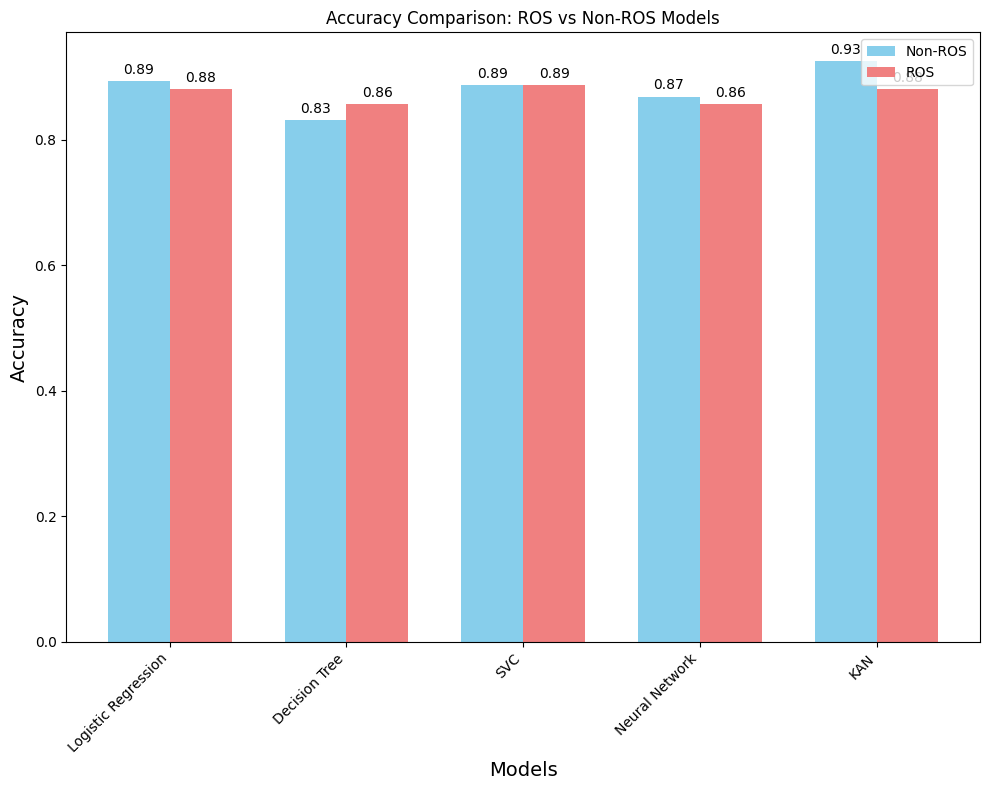

In [143]:
models = [
    ("Logistic Regression", model_lr),
    ("Decision Tree", model_dt),
    ("SVC", model_svc),
    ("Neural Network", nn_1),
    ("KAN", kan)
]

models_ros = [
    ("Logistic Regression (ROS)", model_lr_ros),
    ("Decision Tree (ROS)", model_dt_ros),
    ("SVC (ROS)", model_svc_ros),
    ("Neural Network (ROS)", nn_1_ros),
    ("KAN (ROS)", model_ros)
]

# Function to get accuracy for each model
def get_model_accuracy(model, model_name, X_test_scaled, y_test):
    if model_name == "Neural Network" or model_name == "Neural Network (ROS)":
        y_pred = np.round(model.predict(X_test_scaled))
    elif "KAN" in model_name:
        y_pred = torch.argmax(model.forward(torch.tensor(X_test_scaled, dtype=torch.float32)).detach(), dim=1).numpy()
    else:
        y_pred = model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    return report['accuracy']

# Get accuracies for non-ROS and ROS models
accuracies_non_ros = [get_model_accuracy(model, model_name, X_test_scaled, y_test) for model_name, model in models]
accuracies_ros = [get_model_accuracy(model, model_name, X_test_scaled, y_test) for model_name, model in models_ros]

# Plotting the accuracies for non-ROS vs ROS models
fig, ax = plt.subplots(figsize=(10, 8))

# Bar positions
x = np.arange(len(models))  # the label locations for non-ROS models
width = 0.35  # the width of the bars

# Plot bars for non-ROS and ROS models
rects1 = ax.bar(x - width / 2, accuracies_non_ros, width, label='Non-ROS', color='skyblue')
rects2 = ax.bar(x + width / 2, accuracies_ros, width, label='ROS', color='lightcoral')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models', fontsize = 14)
ax.set_ylabel('Accuracy', fontsize = 14)
ax.set_title('Accuracy Comparison: ROS vs Non-ROS Models')
ax.set_xticks(x)
ax.set_xticklabels([model_name for model_name, _ in models], rotation=45, ha='right')
ax.legend()

# Add accuracy values on top of each bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


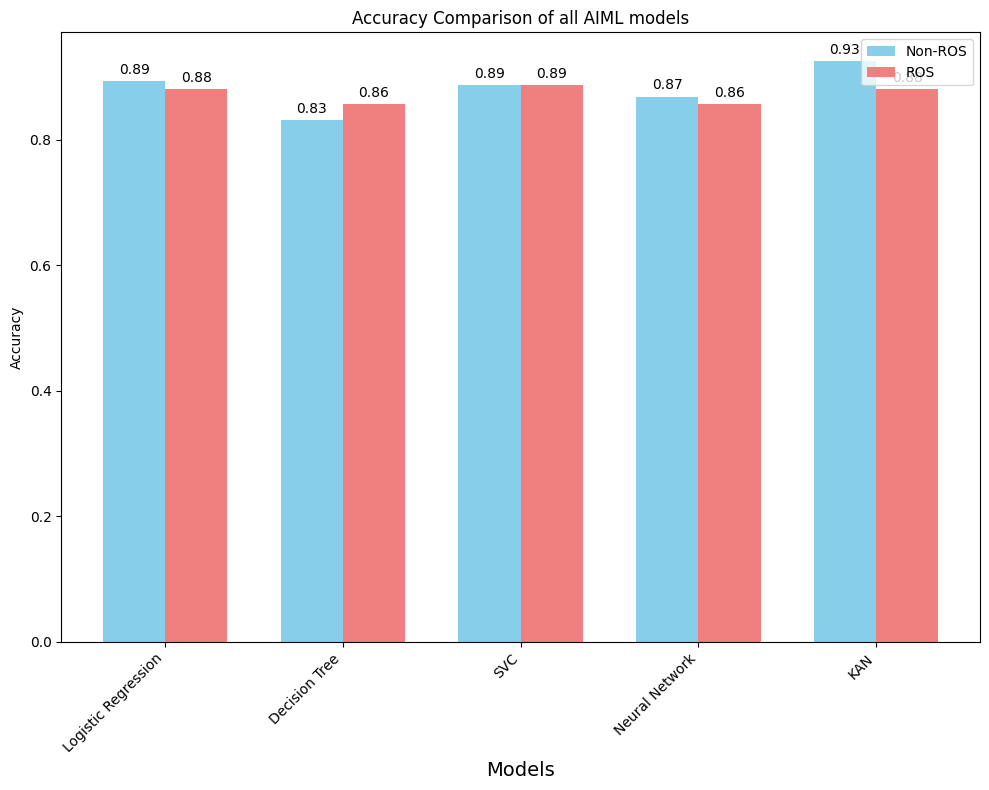

In [144]:
# Change of Title

fig, ax = plt.subplots(figsize=(10, 8))

# Bar positions
x = np.arange(len(models))  # the label locations for non-ROS models
width = 0.35  # the width of the bars

# Plot bars for non-ROS and ROS models
rects1 = ax.bar(x - width / 2, accuracies_non_ros, width, label='Non-ROS', color='skyblue')
rects2 = ax.bar(x + width / 2, accuracies_ros, width, label='ROS', color='lightcoral')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models', fontsize = 14)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of all AIML models')
ax.set_xticks(x)
ax.set_xticklabels([model_name for model_name, _ in models], rotation=45, ha='right')
ax.legend()

# Add accuracy values on top of each bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


**Explainable AI With KAN**

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
model = kan

In [ ]:
# Define the function to use SHAP with your model for one sample
def shap_values_for_model(model, X_train_scaled):
    # Initialize SHAP explainer
    # Instead of passing model.predict, pass the forward function of the model
    # and use the raw outputs (logits) for classification tasks

    def model_predict(inputs):
        # Ensure the input data is a tensor
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
        # Get the raw outputs from the model (logits)
        outputs = model(inputs_tensor)
        # Return the raw logits, not the predicted class
        return outputs.detach().numpy()

    # Initialize SHAP explainer with the model's forward function
    explainer = shap.KernelExplainer(model_predict, X_train_scaled)

    # Get SHAP values for the input dataset (for a single sample)
    shap_values = explainer.shap_values(X_train_scaled)

    return shap_values

# Define a function to visualize SHAP values
def visualize_shap_values(shap_values, X_train_scaled_single):
    # Plot summary of SHAP values (which feature has the largest effect)
    shap.summary_plot(shap_values, X_train_scaled_single)

shap_values = shap_values_for_model(model, X_train_scaled[:100]) # SHAP for 100 predictions of model to ensure generalization.

# Visualize SHAP values
visualize_shap_values(shap_values, X_train_scaled[:100])

# Output was cleared to ensure Readability

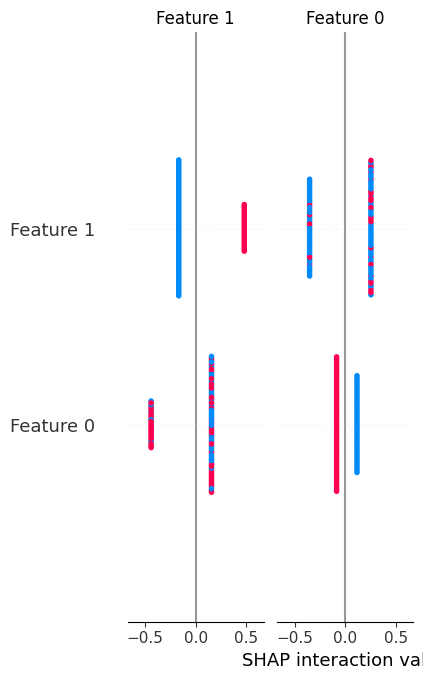

In [ ]:
visualize_shap_values(shap_values, X_train_scaled[:100])

In [ ]:
X_df = pd.DataFrame(X_train_scaled[:100], columns= X.columns)
y_df = pd.DataFrame(y, columns= X.columns)

In [ ]:
shap_values

array([[[-0.08492656,  0.12754332],
        [ 0.07777551, -0.16879194],
        [ 0.17486835, -0.27479462],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.11727954, -0.17613127],
        [ 0.07777552, -0.16879194],
        [-0.42812603,  0.67277296],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[-0.08492655,  0.12754334],
        [-0.22136109,  0.48040784],
        [-0.42812598,  0.67277305],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       ...,

       [[ 0.11727951, -0.17613124],
        [ 0.07777551, -0.16879194],
        [ 0.17486836, -0.27479462],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[-0.08492657,  0.12754329],
        [ 0.07777552, -0.16

In [ ]:
type(shap_values)

numpy.ndarray

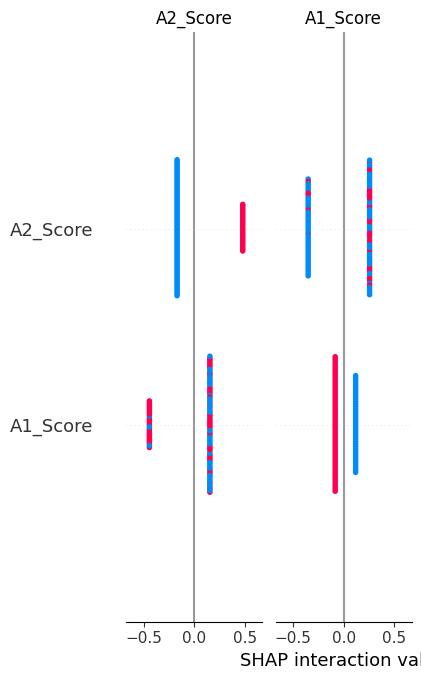

In [ ]:
# Plot a bar chart for feature importance
shap.summary_plot(shap_values, X_train_scaled[:100], plot_type="bar", feature_names=X_df.columns)


In [ ]:
print(shap_values[0][0][0])

0.29507675456088867


In [ ]:
from google.colab import files

In [ ]:
# Save the SHAP Values of KAN
np.save('shap_values.npy', shap_values)

# Download the file in Google Colab
files.download('shap_values.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the SHAP Values of KAN from downloaded file
# Load the .npy file into a NumPy array
shap_values_downloaded = np.load('shap_values.npy')

# Now 'shap_values' is a NumPy array containing the data from the file.
print(type(shap_values_downloaded))
shap_values_downloaded.shape


<class 'numpy.ndarray'>


(100, 65, 2)

**Explainable AI with Support Vector Classifier trained on Augmented ROS Dataset**

  0%|          | 0/100 [00:00<?, ?it/s]

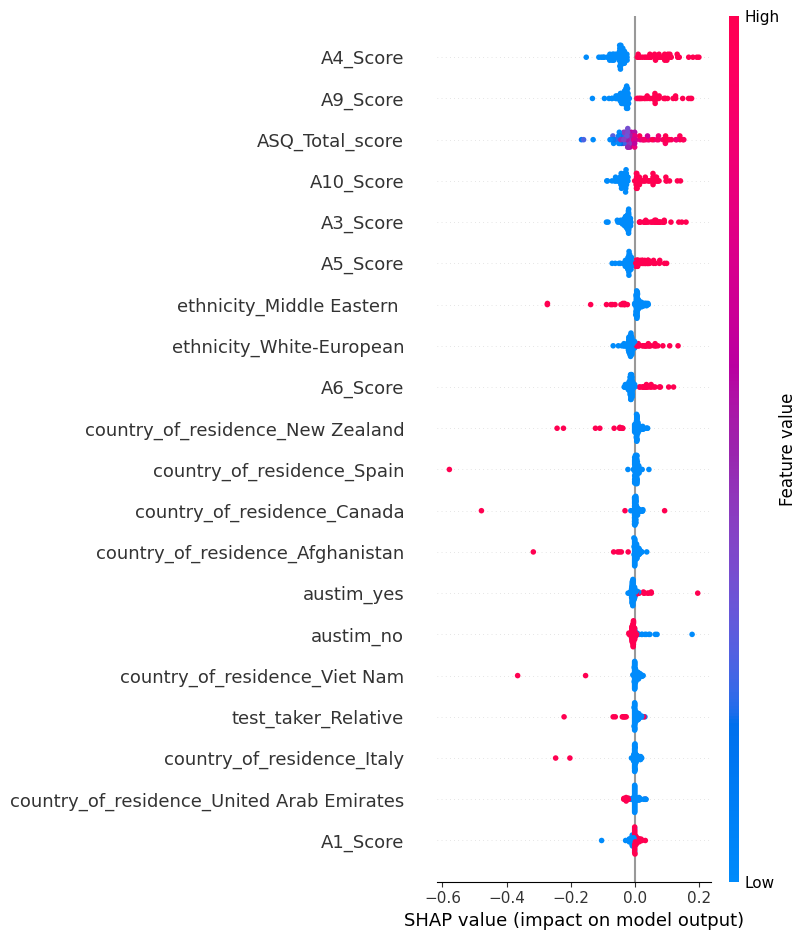

In [ ]:
explainer = shap.KernelExplainer(model_svc_ros.predict, X_resampled[:100])  # Use a subset of the data for faster computation

# Calculate SHAP values
svc_shap_values = explainer.shap_values(X_resampled[:100])

# Generate the SHAP plot
shap.summary_plot(svc_shap_values, X_resampled[:100], feature_names=X.columns)


In [ ]:
# Save the SHAP Values of SVC
np.save('svc_shap_values.npy', svc_shap_values)

# Download the file in Google Colab
files.download('svc_shap_values.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the SHAP Values of SVC from downloaded file
# Load the .npy file into a NumPy array
svc_shap_values_downloaded = np.load('svc_shap_values.npy')

# Now 'shap_values' is a NumPy array containing the data from the file.
print(type(svc_shap_values_downloaded))
svc_shap_values_downloaded.shape


<class 'numpy.ndarray'>


(100, 65)

In [ ]:
# Save X_train_scaled[:100]
np.save('X_train_shap.npy', X_train_scaled[:100])

# Download the file in Google Colab
files.download('X_train_shap.npy')

# Load the X_train Values of from downloaded file
# Load the .npy file into a NumPy array
X_train_shap_downloaded = np.load('X_train_shap.npy')

# Now 'shap_values' is a NumPy array containing the data from the file.
print(type(X_train_shap_downloaded))
X_train_shap_downloaded.shape


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'numpy.ndarray'>


(100, 65)